In [17]:
%pip install gurobipy
import numpy as np
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [18]:
rnd = np.random
rnd.seed(51)

In [19]:
n = 10  # number of clients
f = 5  # number of charging stations
num_points = n + f + 1

# Generate random coordinates for xc and yc
xc = np.random.rand(num_points) * 200
yc = np.random.rand(num_points) * 100

# Randomly select f points from the generated points
selected_indices = np.random.choice(num_points, f, replace=False)
selected_xc = xc[selected_indices]
selected_yc = yc[selected_indices]

# Remove the selected points from xc and yc
xc = np.delete(xc, selected_indices)
yc = np.delete(yc, selected_indices)
xc=np.append(xc,xc[0])
yc=np.append(yc,yc[0])

print(xc)
print(yc)
num_of_copies = 3
# Append copies of each selected point after the first n points
for i in range(f):
    for _ in range(num_of_copies):
        xc = np.append(xc, selected_xc[i])
        yc = np.append(yc, selected_yc[i])
print("Remaining xc:", xc)
print("Remaining yc:", yc)

[  8.94243644 128.8039454   56.84259975 189.86756133  31.53403375
  77.59459248  97.55915826  43.63651224 129.34910884  49.96628183
   9.5451566    8.94243644]
[29.22017587  6.02748056 75.46383918 72.87108304 56.47609387 71.41213954
 63.91391136 86.94905599 34.99918982 30.78997273 37.21481787 29.22017587]
Remaining xc: [  8.94243644 128.8039454   56.84259975 189.86756133  31.53403375
  77.59459248  97.55915826  43.63651224 129.34910884  49.96628183
   9.5451566    8.94243644 135.1462831  135.1462831  135.1462831
  82.04959722  82.04959722  82.04959722  68.66073451  68.66073451
  68.66073451 117.99873529 117.99873529 117.99873529  34.8686772
  34.8686772   34.8686772 ]
Remaining yc: [29.22017587  6.02748056 75.46383918 72.87108304 56.47609387 71.41213954
 63.91391136 86.94905599 34.99918982 30.78997273 37.21481787 29.22017587
 32.3548296  32.3548296  32.3548296  60.3723935  60.3723935  60.3723935
 44.54105029 44.54105029 44.54105029 58.23560806 58.23560806 58.23560806
 79.51987286 79.51

27


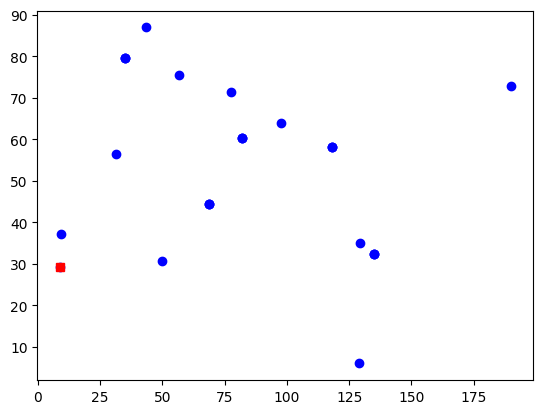

In [20]:
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')
print(len(xc))

In [21]:
I = [i for i in range(1, n+1)] #Number of nodes/locations
F = [i for i in range(n+2,n+2+num_of_copies*f)]
N = I + F
F_depo = [0] + F
I_depo = [0] + N
I_dest = N + [n+1]
I_depo_dest = N + [0] + [n+1]
print(I_dest)
num_of_vehicles = 5
K = [i for i in range(1,num_of_vehicles+1)]
A = [(i, j, k) for i in I_depo for j in I_dest for k in K if i != j] 
dist = [(i, j) for i in I_depo for j in I_dest if i != j] 
total_with_vehicles = [(i,k) for i in I_depo_dest for k in K]
print("aman")
print(K)
c = {(i, j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i, j in dist} 
C = 15                
q = {i: rnd.randint(1, 10) for i in N}
# for _ in range()
Q = 500
H = 50 
max_value = max(c.values())
Q = H*1.1*max_value
print(I)
print(F)
print(N)
print(q)
q[0]=0
for i in range(n+1,n+2+num_of_copies*f):
    q[i] = 0
print(q)
print(Q)
Q=10000
print(n+1)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 11]
aman
[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
{1: 5, 2: 2, 3: 9, 4: 4, 5: 8, 6: 4, 7: 4, 8: 5, 9: 5, 10: 5, 12: 1, 13: 1, 14: 4, 15: 8, 16: 6, 17: 5, 18: 5, 19: 7, 20: 8, 21: 9, 22: 1, 23: 5, 24: 6, 25: 5, 26: 3}
{1: 5, 2: 2, 3: 9, 4: 4, 5: 8, 6: 4, 7: 4, 8: 5, 9: 5, 10: 5, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 0: 0, 11: 0}
10236.400251196
11


In [22]:
from gurobipy import Model, GRB, quicksum

model = Model('ECVRP')
x = model.addVars(A, vtype=GRB.BINARY, name='x')
u = model.addVars(total_with_vehicles, vtype=GRB.CONTINUOUS,lb=0,ub=C, name='u')
y = model.addVars(total_with_vehicles, vtype=GRB.CONTINUOUS,lb=0, ub=Q, name='y')
h = model.addVars(total_with_vehicles, vtype=GRB.CONTINUOUS, name='h')

# for i in I_depo_dest:
#     h[i] = H + u[i] / C

model.modelSense = GRB.MINIMIZE
# u[0].setAttr(GRB.Attr.LB, C)
# u[0].setAttr(GRB.Attr.UB, C)
# y[0].setAttr(GRB.Attr.LB, Q)
# y[0].setAttr(GRB.Attr.UB, Q)

model.setObjective(quicksum(x[i, j, k]*c[i, j] for i, j, k in A))
model.addConstrs((quicksum(x[i, j, k] for k in K for j in I_dest if i!=j) == 1 for i in I), name='outgoing')
model.addConstrs((quicksum(x[i, j, k] for k in K for j in I_dest if i!=j) <= 1 for i in F), name='charging_outgoing')
model.addConstrs((quicksum(x[0, j, k] for j in N) <= 1 for k in K), name='charging_outgoing')
model.addConstrs((quicksum(x[i, j, k] for i in I_depo if i!=j)-quicksum(x[j,i,k] for i in I_dest if i!=j) == 0 for j in N for k in K), name='blockage')
model.addConstrs((u[j,k]<=u[i,k]-q[i]*x[i,j,k]+ C*(1-x[i,j,k]) for i in I_depo for j in I_dest if i!=j for k in K), name='weight_transfer')
# model.addConstrs((u[i]>=0 for i in I_dest), name='weight_lower_bound')
# model.addConstrs((u[0]<=C), name='weight_upper_bound')
Temp = 323
theta = 0.1
H = H*0.8 + Temp*(theta)
model.addConstrs(h[i,k] == H + u[i,k] / C for i in I_depo_dest for k in K)
model.addConstrs((y[j,k]<=y[i,k]-h[i,k]*c[i,j]*x[i,j,k]+Q*(1-x[i,j,k]) for i in I for j in  I_dest  if i!=j for k in K), name = 'charge_left')
model.addConstrs((y[j,k]<=Q-h[i,k]*c[i,j]*x[i,j,k] for i in F_depo for j in I_dest  if i!=j for k in K), name='after leaving from charging station')
# model.addConstrs((y[i]>=0 for i in I_dest), name='charge_lower_bound')
# model.addConstrs((y[i]<=Q for i in N), name='charge_upper_bound')
# model.addConstr(u[0]==C, name='Specifying_constant_weight')
model.addConstrs((u[0,k]==C for k in K), name='Specifying_constant_weight')
model.addConstrs((y[0,k]==Q for k in K), name='Specifying_constant_charge')
model.Params.MIPGap = 0.1
model.Params.TimeLimit = 500  # seconds
model.optimize()
# optimal path -  active paths


Set parameter MIPGap to value 0.1
Set parameter TimeLimit to value 500
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6500U CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 3555 rows, 3660 columns and 19545 nonzeros
Model fingerprint: 0xca7308b2
Model has 3255 quadratic constraints
Variable types: 405 continuous, 3255 integer (3255 binary)
Coefficient statistics:
  Matrix range     [7e-02, 2e+01]
  QMatrix range    [6e+00, 2e+02]
  QLMatrix range   [1e+00, 1e+04]
  Objective range  [6e+00, 2e+02]
  Bounds range     [1e+00, 1e+04]
  RHS range        [1e+00, 1e+04]
  QRHS range       [1e+04, 1e+04]
Presolve removed 310 rows and 245 columns
Presolve time: 0.17s
Presolved: 9025 rows, 6305 columns, 55144 nonzeros
Variable types: 3065 continuous, 3240 integer (3160 binary)

Root relaxation: objective 3.510509e+02, 149 iterations, 0.02 seconds (0.01 work 

In [23]:
# model.computeIIS()
model.write("model4.lp")

In [24]:
for var_name in u:
    u_var = u[var_name]
    print(f"{var_name} = {u_var.X}")

(1, 1) = 0.0
(1, 2) = 0.0
(1, 3) = 14.999986673709145
(1, 4) = 0.0
(1, 5) = 0.0
(2, 1) = 0.0
(2, 2) = 5.9999999999856755
(2, 3) = 0.0
(2, 4) = 0.0
(2, 5) = 0.0
(3, 1) = 8.999999999999773
(3, 2) = 15.0
(3, 3) = 0.0
(3, 4) = 0.0
(3, 5) = 0.0
(4, 1) = 0.0
(4, 2) = 3.9999964482333326
(4, 3) = 0.0
(4, 4) = 0.0
(4, 5) = 0.0
(5, 1) = 0.0
(5, 2) = 0.0
(5, 3) = 0.0
(5, 4) = 0.0
(5, 5) = 8.0
(6, 1) = 15.0
(6, 2) = 0.0
(6, 3) = 0.0
(6, 4) = 0.0
(6, 5) = 0.0
(7, 1) = 0.0
(7, 2) = 9.999999999985903
(7, 3) = 0.0
(7, 4) = 0.0
(7, 5) = 0.0
(8, 1) = 0.0
(8, 2) = 0.0
(8, 3) = 9.999991115806097
(8, 4) = 0.0
(8, 5) = 0.0
(9, 1) = 0.0
(9, 2) = 15.0
(9, 3) = 0.0
(9, 4) = 0.0
(9, 5) = 15.0
(10, 1) = 0.0
(10, 2) = 0.0
(10, 3) = 4.999995557903276
(10, 4) = 15.0
(10, 5) = 0.0
(12, 1) = 0.0
(12, 2) = 0.0
(12, 3) = 0.0
(12, 4) = 0.0
(12, 5) = 15.0
(13, 1) = 0.0
(13, 2) = 0.0
(13, 3) = 9.999991115806097
(13, 4) = 0.0
(13, 5) = 15.0
(14, 1) = 8.999999999999773
(14, 2) = 0.0
(14, 3) = 0.0
(14, 4) = 0.0
(14, 5) = 15.

In [25]:
for var_name in h:
    h_var = h[var_name]
    print(f"{var_name} = {h_var.X}")

(1, 1) = 72.30000000000001
(1, 2) = 72.30000000000001
(1, 3) = 73.29999911158063
(1, 4) = 72.30000000000001
(1, 5) = 72.30000000000001
(2, 1) = 72.30000000000001
(2, 2) = 72.69999999999906
(2, 3) = 72.30000000000001
(2, 4) = 72.30000000000001
(2, 5) = 72.30000000000001
(3, 1) = 72.9
(3, 2) = 73.30000000000001
(3, 3) = 72.30000000000001
(3, 4) = 72.30000000000001
(3, 5) = 72.30000000000001
(4, 1) = 72.30000000000001
(4, 2) = 72.56666642988223
(4, 3) = 72.30000000000001
(4, 4) = 72.30000000000001
(4, 5) = 72.30000000000001
(5, 1) = 72.30000000000001
(5, 2) = 72.30000000000001
(5, 3) = 72.30000000000001
(5, 4) = 72.30000000000001
(5, 5) = 72.83333333333334
(6, 1) = 73.30000000000001
(6, 2) = 72.30000000000001
(6, 3) = 72.30000000000001
(6, 4) = 72.30000000000001
(6, 5) = 72.30000000000001
(7, 1) = 72.30000000000001
(7, 2) = 72.96666666666574
(7, 3) = 72.30000000000001
(7, 4) = 72.30000000000001
(7, 5) = 72.30000000000001
(8, 1) = 72.30000000000001
(8, 2) = 72.30000000000001
(8, 3) = 72.96

In [26]:
for var_name in y:
    y_var = y[var_name]
    print(f"{var_name} = {y_var.X}")

(1, 1) = 8014.997895500612
(1, 2) = 3951.9505291033715
(1, 3) = 3951.9505291033715
(1, 4) = 5918.898953707356
(1, 5) = 1985.0021044993864
(2, 1) = 0.0
(2, 2) = 6833.968275392066
(2, 3) = 0.0
(2, 4) = 0.0
(2, 5) = 0.0
(3, 1) = 5009.144572575082
(3, 2) = 5009.144572575082
(3, 3) = 0.0
(3, 4) = 5009.144572575082
(3, 5) = 0.0
(4, 1) = 0.0
(4, 2) = 2568.965680367757
(4, 3) = 0.0
(4, 4) = 0.0
(4, 5) = 2112.870751545963
(5, 1) = 0.0
(5, 2) = 0.0
(5, 3) = 6878.962325484538
(5, 4) = 2075.657800617643
(5, 5) = 5868.9750452070175
(6, 1) = 7060.8434892633295
(6, 2) = 8833.887459450312
(6, 3) = 0.0
(6, 4) = 9984.091234098913
(6, 5) = 3475.0047649941266
(7, 1) = 0.0
(7, 2) = 9161.461894513825
(7, 3) = 0.0
(7, 4) = 0.0
(7, 5) = 0.0
(8, 1) = 5890.99566980066
(8, 2) = 5652.229133295127
(8, 3) = 9325.515203784149
(8, 4) = 0.0
(8, 5) = 0.0
(9, 1) = 0.0
(9, 2) = 0.0
(9, 3) = 0.0
(9, 4) = 3386.7058244202835
(9, 5) = 4622.717983628903
(10, 1) = 0.0
(10, 2) = 0.0
(10, 3) = 582.3248486865483
(10, 4) = 10000.0

[(0, 9, 5), (0, 17, 1), (0, 20, 3), (0, 24, 2), (1, 13, 3), (2, 4, 2), (3, 12, 1), (4, 11, 2), (5, 11, 5), (6, 14, 1), (7, 2, 2), (8, 10, 3), (9, 19, 5), (10, 11, 3), (12, 11, 1), (13, 8, 3), (14, 3, 1), (17, 6, 1), (19, 5, 5), (20, 1, 3), (24, 26, 2), (25, 7, 2), (26, 25, 2)]


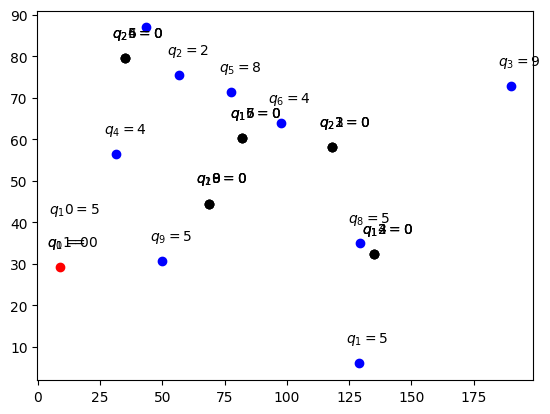

In [27]:
active_arcs = [a for a in A if x[a].x > 0.99]

print(active_arcs)
plt.scatter(xc[1:n], yc[1:n], c = 'b')
plt.scatter(xc[n+2:],yc[n+2:], c= 'black')
plt.scatter(xc[0], yc[0], c='r')

# plt.title('Optimal route with %s as max weight'%C, fontsize = 20)
for i in I_depo_dest:
    plt.annotate('$q_%d = %d$' % (i,q[i]), (xc[i]-5, yc[i]+5))
    # plt.annotate('$q_%d = %d$' % (i,y[i]), (xc[i]-5, yc[i]+5))
# number_of_vehicles=0
# for i,j,k in active_arcs:
#     if(i==0):
#        plt.plot([xc[i],xc[j]], [yc[i], yc[j]], c = 'g')
plt.show()
# print(number_of_vehicles)

In [34]:
values = {}
sum=0
vehicle_dist={}
for i,j,k in active_arcs:
    sum+=(c[i,j])
    if(k not in vehicle_dist):
      vehicle_dist[k]=c[i,j]
    else:
         vehicle_dist[k]+=c[i,j]
    if i!=0:
        values[i]=(j,k)
for i in vehicle_dist.values():
     print(i)
colors = ['magenta', 'green', 'red', 'yellow', 'cyan']
def rec(i, j,k,col):
        print((i,j,k))
        plt.plot([xc[i],xc[j]], [yc[i], yc[j]], c = colors[col])
        if(j==n+1):
             return
        print("aman")
        print(values[j][0])
        rec(j,values[j][0],values[j][1],col)


173.1592701689006
406.8745845268372
294.3641668323708
152.62304547857022


In [29]:
print(c[0,17])
print(c[0,6])
print(c[0,6]*51)
# print(c[0,5]*h[5].X)

79.46771432662608
95.16605838557892
4853.468977664525


[(0, 9, 5), (0, 17, 1), (0, 20, 3), (0, 24, 2), (1, 13, 3), (2, 4, 2), (3, 12, 1), (4, 11, 2), (5, 11, 5), (6, 14, 1), (7, 2, 2), (8, 10, 3), (9, 19, 5), (10, 11, 3), (12, 11, 1), (13, 8, 3), (14, 3, 1), (17, 6, 1), (19, 5, 5), (20, 1, 3), (24, 26, 2), (25, 7, 2), (26, 25, 2)]
(0, 9, 5)
aman
19
(9, 19, 5)
aman
5
(19, 5, 5)
aman
11
(5, 11, 5)
(0, 17, 1)
aman
6
(17, 6, 1)
aman
14
(6, 14, 1)
aman
3
(14, 3, 1)
aman
12
(3, 12, 1)
aman
11
(12, 11, 1)
(0, 20, 3)
aman
1
(20, 1, 3)
aman
13
(1, 13, 3)
aman
8
(13, 8, 3)
aman
10
(8, 10, 3)
aman
11
(10, 11, 3)
(0, 24, 2)
aman
26
(24, 26, 2)
aman
25
(26, 25, 2)
aman
7
(25, 7, 2)
aman
2
(7, 2, 2)
aman
4
(2, 4, 2)
aman
11
(4, 11, 2)


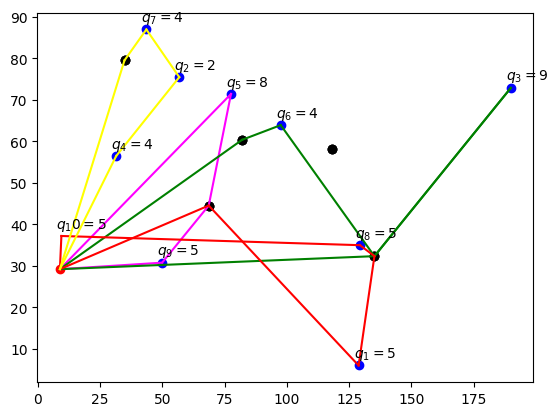

In [30]:
active_arcs = [a for a in A if x[a].x > 0.99]

print(active_arcs)
plt.scatter(xc[1:n], yc[1:n], c = 'b')
plt.scatter(xc[n+2:],yc[n+2:], c= 'black')
plt.scatter(xc[0], yc[0], c='r')

# plt.title('Optimal route with %s as max weight'%C, fontsize = 20)
visited = []
for i in I:
    if(xc[i] not in visited):
      plt.annotate('$q_%d = %d$' % (i,q[i]), (xc[i]-2, yc[i]+2))
      visited.append(xc[i])
    # plt.annotate('$q_%d = %d$' % (i,y[i]), (xc[i]-5, yc[i]+5))
# import random

# number_of_vehicles=0
col=0
# print(type(active_arcs))
for i,j,k in active_arcs:
    if(i==0):
        rec(i,j,k,col)
        col+=1
plt.show()
# print(number_of_vehicles)